In [17]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import welch
import gdown

### **1.** Creación de la señal

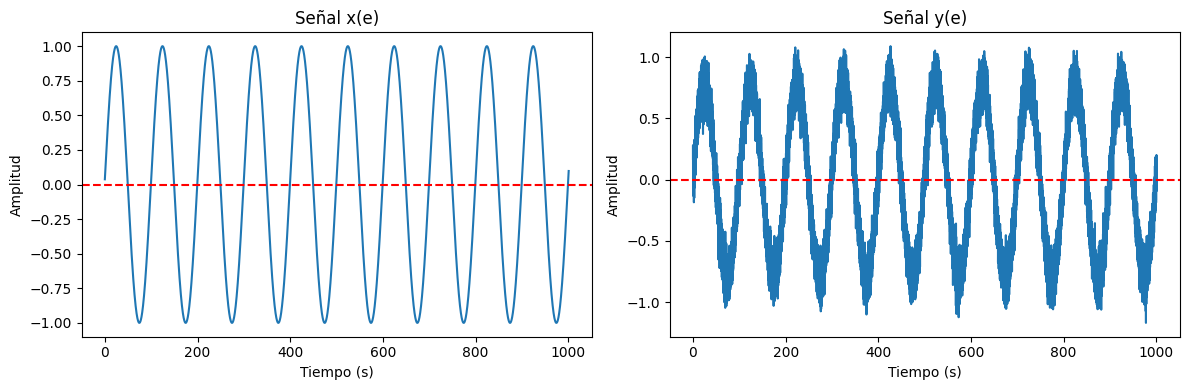

In [2]:
F0 = 0.01 # frecuencia fundamental
Fs = 25 #frecuencia de muestreo
alfa = 0.8 # atenuación
D = 15 # retrado induciodo en la adquisición
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_ideal = np.sin(2 * np.pi * F0 * n) # Señal ideal (sin retardo ni ruido)
x_e = np.sin(2*np.pi*F0*(n+D/Fs)) #potencial con retraso
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e + w # señal adquirida con ruido y retrado.

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(n,x_e)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Señal x(e)")
plt.axhline(0, color='red', linestyle='--')
plt.subplot(1,2,2)
plt.plot(n,y_e)
plt.title("Señal y(e)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.axhline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()


### **1.1** Función para respuesta en la frecuencia y fase

In [3]:
def mfreqz(b,a,order,nyq_rate = 1):
    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(8,10))
    plt.subplot(311)
    plt.plot((w/max(w))*nyq_rate,abs(h))
    plt.ylabel('Magnitude')
    plt.xlabel(r'Normalized Frequency')
    plt.title(r'Frequency response. Order: ' + str(order))
    [xmin, xmax, ymin, ymax] = plt.axis()
    plt.grid(True)


### **2.** Diseño filtros
#### **2.1.** Filtros FIR

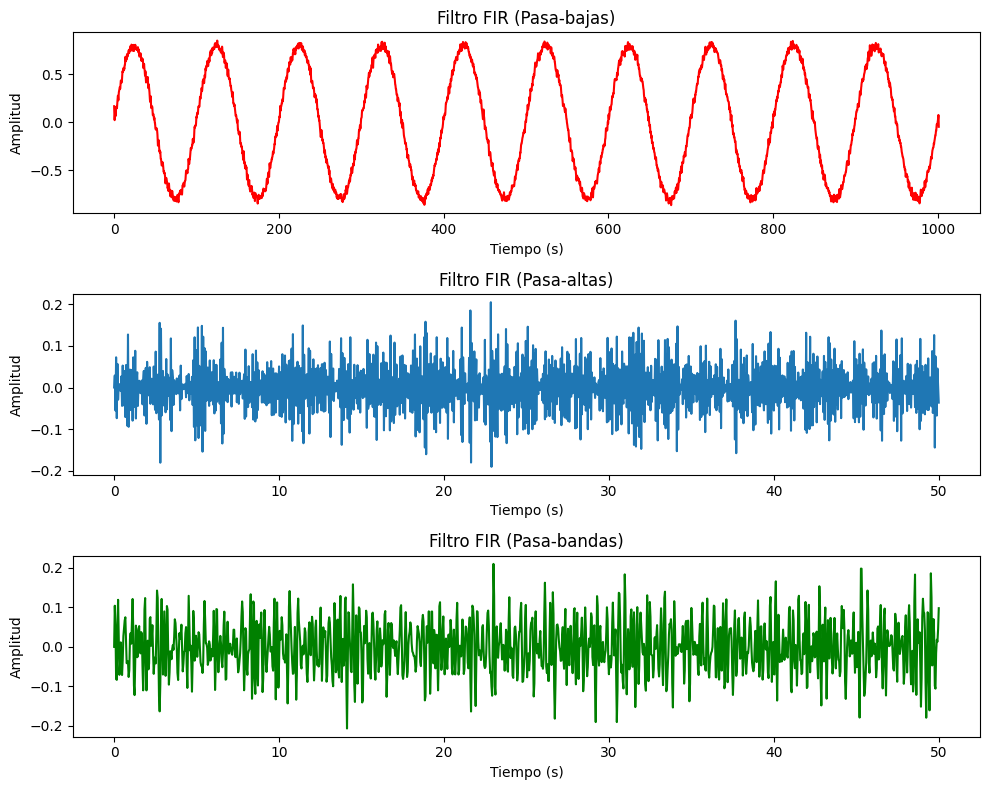

In [4]:
order = 30 # orden
nyquist = Fs/2 # frecuencia de nyquist
wn = [1.25/nyquist, 7.5/nyquist] # frecuencia de corte normalizada
mascara = n <= 50

lowpass = signal.firwin(order+1,wn[0], pass_zero = 'lowpass',window='hamming')
highpass = signal.firwin(order+1,wn[1], pass_zero = 'highpass',window='hamming')
passband = signal.firwin(order+1,wn, pass_zero = 'bandpass',window='hamming')
y_l_30 = signal.filtfilt(b=lowpass,a=1,x=y_e)
y_h_30 = signal.filtfilt(b=highpass,a=1,x=y_e)
y_p_30 = signal.filtfilt(b=passband,a=1,x=y_e)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(n,y_l_30,color='r')
plt.title("Filtro FIR (Pasa-bajas)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

plt.subplot(3,1,2)
plt.plot(n[mascara],y_h_30[mascara])
plt.title("Filtro FIR (Pasa-altas)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

plt.subplot(3,1,3)
plt.plot(n[mascara],y_p_30[mascara],color='g')
plt.title("Filtro FIR (Pasa-bandas)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

plt.tight_layout()
plt.show()

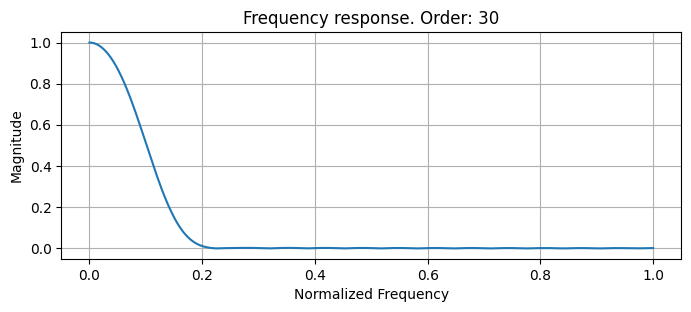

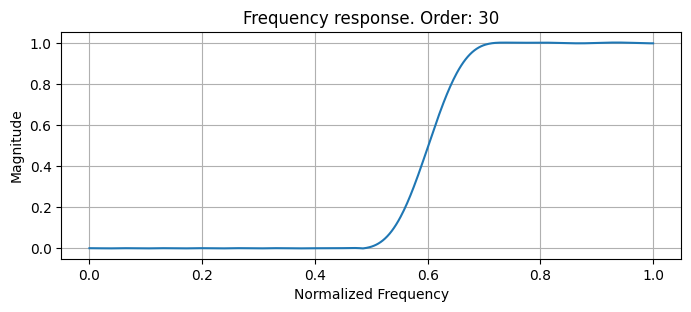

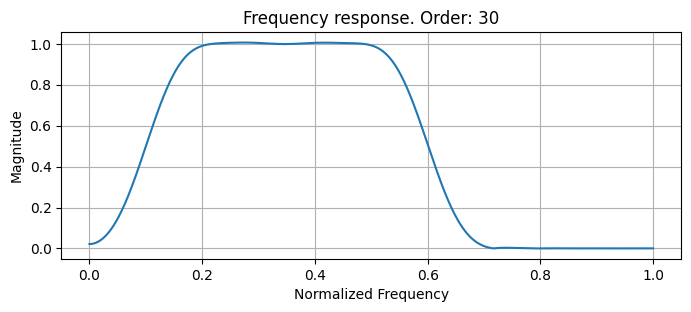

In [5]:
mfreqz(b=lowpass,a=1,order=order)
mfreqz(b=highpass,a=1,order=order)
mfreqz(b=passband,a=1,order=order)

#### **2.2.** Filtros IIR

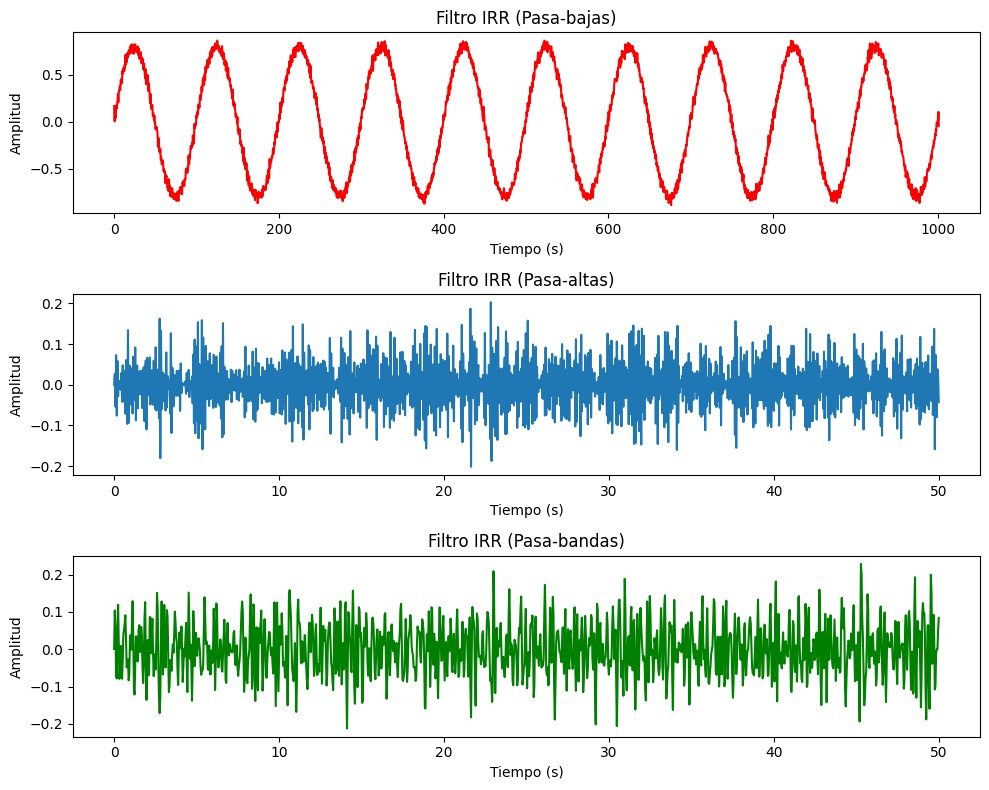

In [6]:
order_iir = 8 # Orden
b_low, a_low = signal.iirfilter(order_iir, wn[0], btype='low', ftype='butter')
b_high, a_high = signal.iirfilter(order_iir, wn[1], btype='high', ftype='butter')
b_band, a_band = signal.iirfilter(order_iir, wn, btype='bandpass', ftype='butter')
y_l_30_iir = signal.filtfilt(b_low, a_low, y_e)
y_h_30_iir = signal.filtfilt(b_high, a_high, y_e)
y_p_30_iir = signal.filtfilt(b_band, a_band, y_e)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(n,y_l_30_iir,color='r')
plt.title("Filtro IRR (Pasa-bajas)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

plt.subplot(3,1,2)
plt.plot(n[mascara],y_h_30_iir[mascara])
plt.title("Filtro IRR (Pasa-altas)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

plt.subplot(3,1,3)
plt.plot(n[mascara],y_p_30_iir[mascara],color='g')
plt.title("Filtro IRR (Pasa-bandas)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

plt.tight_layout()
plt.show()

/tmp/ipython-input-3-3587426947.py:3: RuntimeWarning: divide by zero encountered in log10
  h_dB = 20 * np.log10 (abs(h));


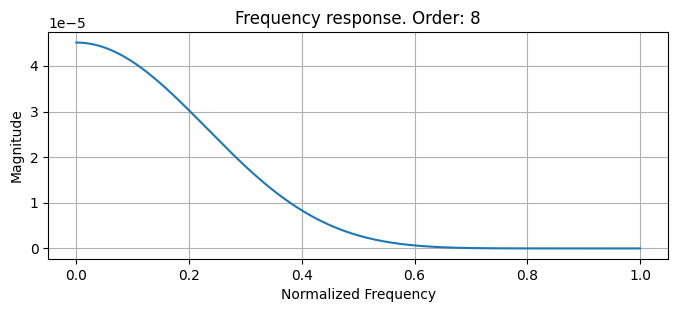

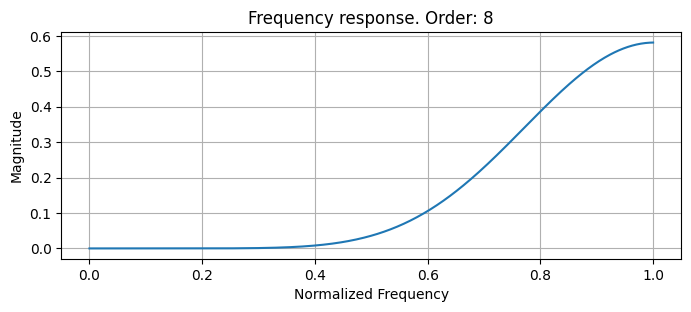

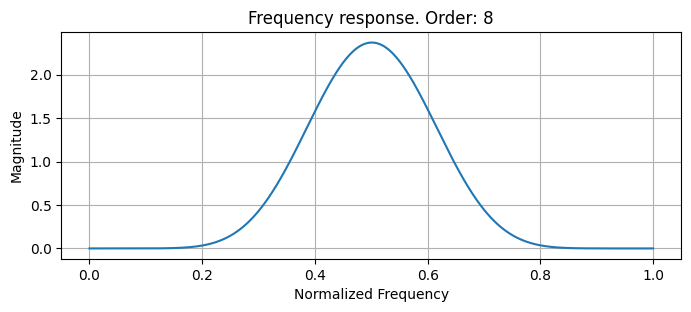

In [7]:
mfreqz(b=b_low,a=1,order=order_iir)
mfreqz(b=b_high,a=1,order=order_iir)
mfreqz(b=b_band,a=1,order=order_iir)

### **3.** Filtrado
#### **3.1.** Filtro FIR

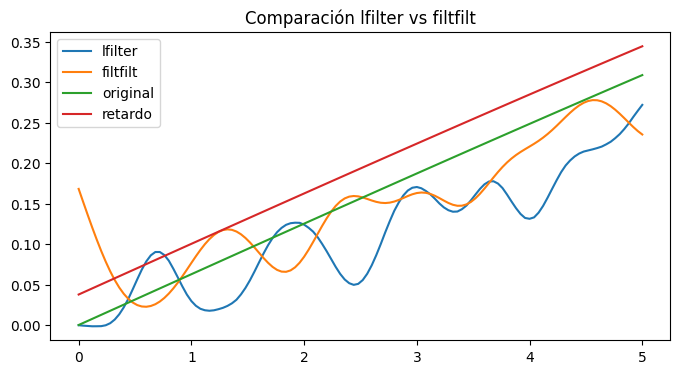

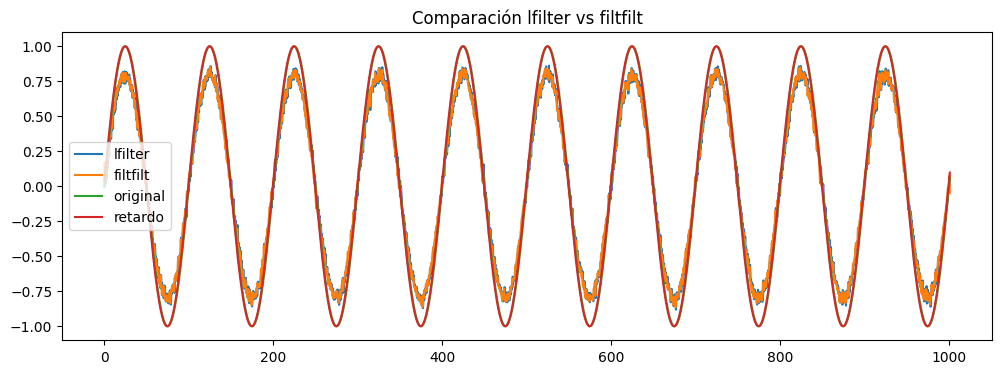

In [8]:
k= n <= 5
y1 = signal.lfilter(lowpass, 1, y_e)
y2 = signal.filtfilt(lowpass, 1, y_e)

plt.figure(figsize=(8,4))
plt.plot(n[k], y1[k], label='lfilter')
plt.plot(n[k], y2[k], label='filtfilt')
plt.plot(n[k], x_ideal[k], label='original')
plt.plot(n[k], x_e[k], label='retardo')
plt.legend()
plt.title("Comparación lfilter vs filtfilt")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n, y1, label='lfilter')
plt.plot(n, y2, label='filtfilt')
plt.plot(n, x_ideal, label='original')
plt.plot(n, x_e, label='retardo')
plt.legend()
plt.title("Comparación lfilter vs filtfilt")
plt.show()

#### **3.2** Filtro IIR

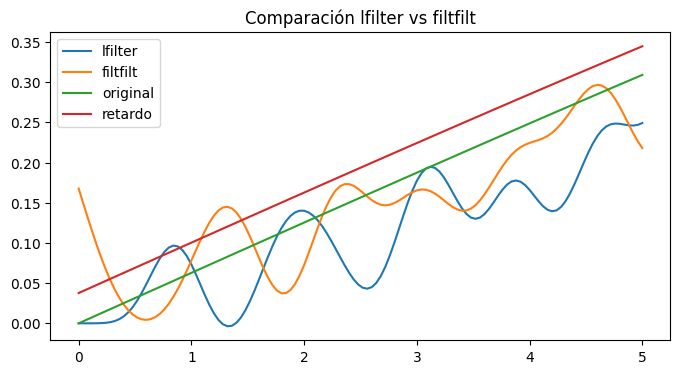

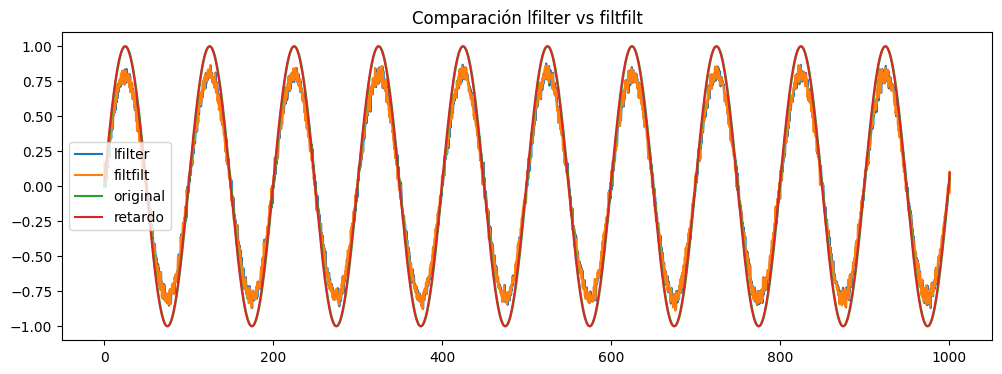

In [9]:

I1 = signal.lfilter(b_low, a_low, y_e)
I2 = signal.filtfilt(b_low, a_low, y_e)

plt.figure(figsize=(8,4))
plt.plot(n[k], I1[k], label='lfilter')
plt.plot(n[k], I2[k], label='filtfilt')
plt.plot(n[k], x_ideal[k], label='original')
plt.plot(n[k], x_e[k], label='retardo')
plt.legend()
plt.title("Comparación lfilter vs filtfilt")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n, I1, label='lfilter')
plt.plot(n, I2, label='filtfilt')
plt.plot(n, x_ideal, label='original')
plt.plot(n, x_e, label='retardo')
plt.legend()
plt.title("Comparación lfilter vs filtfilt")
plt.show()

### **4.** Aplicación

In [18]:
# URL de los datos
url = 'https://drive.google.com/uc?id=1lyQHuw4fdIsCNAskYKOhkSFkwX3vo8Jq'
output = 'senal_filtros.txt'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1lyQHuw4fdIsCNAskYKOhkSFkwX3vo8Jq
To: /content/senal_filtros.txt
100%|██████████| 7.68M/7.68M [00:00<00:00, 89.0MB/s]


'senal_filtros.txt'

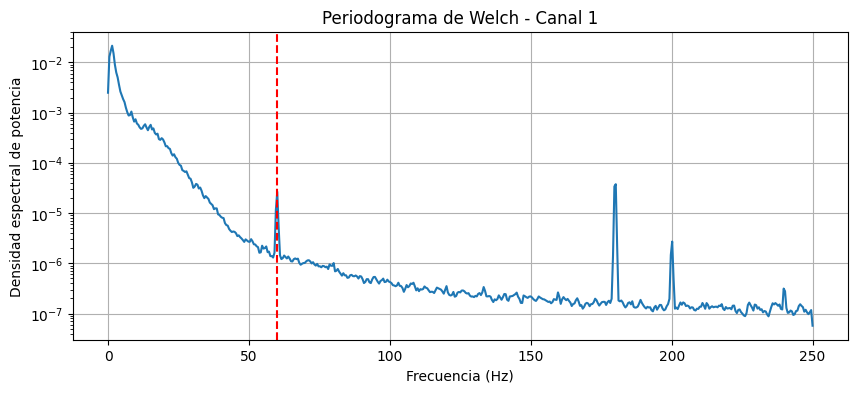

In [19]:
# Señal
data = np.loadtxt("senal_filtros.txt")
# Canal 1
canal1 = data[:, 0]
# Frecuencia de muestreo
Fs = 500
t = np.arange(len(canal1)) / Fs
# periodograma de Welch
frequencies, power = welch(canal1, fs=Fs, nperseg=1024)

# Grafico
plt.figure(figsize=(10, 4))
plt.semilogy(frequencies, power)
plt.title("Periodograma de Welch - Canal 1")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia")
plt.axvline(x=60, color='r', linestyle='--', label='60 Hz')
plt.grid(True)
plt.show()


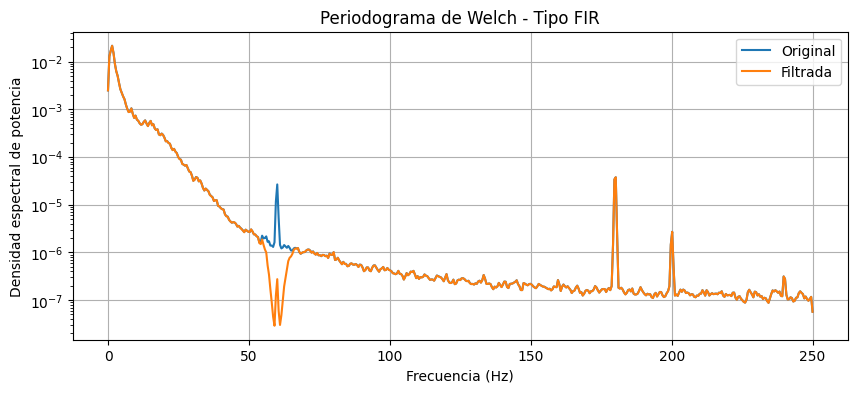

In [20]:
# Diseño del filtro FIR
nyq = Fs / 2
low = 58/nyq
high = 62/nyq
fcc=[low, high]
o = 181

filtro_fir = signal.firwin(numtaps= o, cutoff= fcc, pass_zero= 'bandstop', window='hamming')
canal1_filtrada = signal.filtfilt(filtro_fir, 1, canal1)
# Periodograma de Welch
frequencies_filt, power_filt = welch(canal1_filtrada, fs=Fs, nperseg=1024)

plt.figure(figsize=(10, 4))
plt.semilogy(frequencies, power, label='Original')
plt.semilogy(frequencies_filt, power_filt, label='Filtrada')
plt.title("Periodograma de Welch - Tipo FIR")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia")
plt.legend()
plt.grid(True)
plt.show()

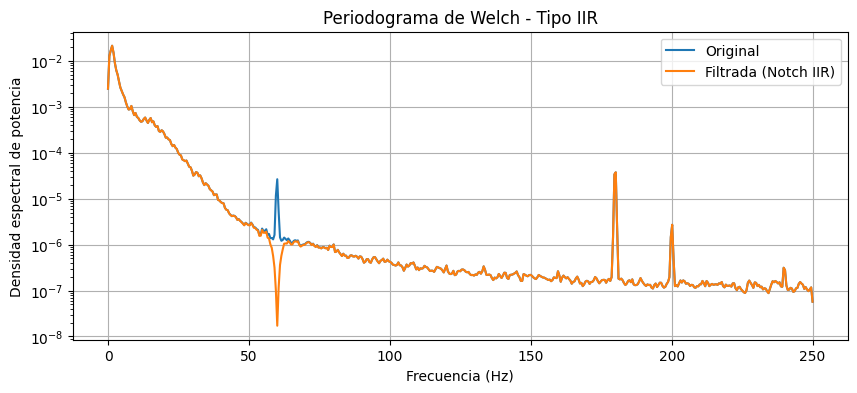

In [21]:
# Diseño del filtro IIR
f0 = 60
Q = 30

b, a = signal.iirnotch(f0, Q, Fs)
canal1_filtrada_iir = signal.filtfilt(b, a, canal1)
# Periodograma de Welch
frequencies, power = signal.welch(canal1, fs=Fs, nperseg=1024)
frequencies_filt, power_filt = signal.welch(canal1_filtrada_iir, fs=Fs, nperseg=1024)

plt.figure(figsize=(10, 4))
plt.semilogy(frequencies, power, label='Original')
plt.semilogy(frequencies_filt, power_filt, label='Filtrada (Notch IIR)')
plt.title("Periodograma de Welch - Tipo IIR")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia")
plt.legend()
plt.grid(True)
plt.show()

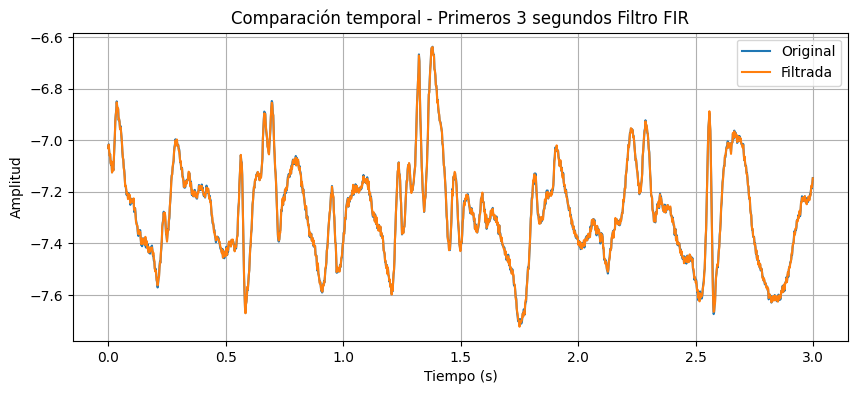

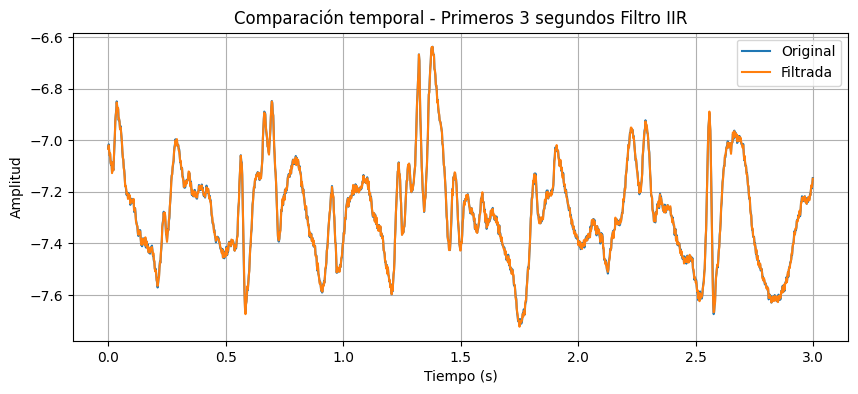

In [22]:
# Señal en el tiempo para los filtros FIR e IIR
tiempo_seg = 3
muestras = int(Fs * tiempo_seg)

plt.figure(figsize=(10, 4))
plt.plot(t[:muestras], canal1[:muestras], label='Original')
plt.plot(t[:muestras], canal1_filtrada[:muestras], label='Filtrada')
plt.title("Comparación temporal - Primeros 3 segundos Filtro FIR")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t[:muestras], canal1[:muestras], label='Original')
plt.plot(t[:muestras], canal1_filtrada_iir[:muestras], label='Filtrada')
plt.title("Comparación temporal - Primeros 3 segundos Filtro IIR")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()